## Classification examples using pretrained models

Tutorial from http://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/

and the keras repo: https://github.com/fchollet/deep-learning-models


In [753]:
from resnet50 import ResNet50
from keras.preprocessing import image
from imagenet_utils import preprocess_input, decode_predictions

import numpy as np
import cv2
from matplotlib import pyplot as plt
from __future__ import division
import time
import h5py
import json

In [40]:
%matplotlib inline

In [41]:
model = ResNet50(weights='imagenet')

K.image_dim_ordering: tf


In [8]:
img_path = 'soccer_ball.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

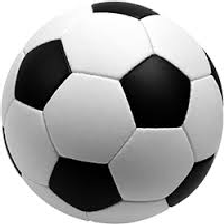

In [20]:
img

In [10]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

40960/35363 [==================================] - 0s 
('Predicted:', [[(u'n04254680', u'soccer_ball', 0.99918562), (u'n03530642', u'honeycomb', 0.00080454251), (u'n04540053', u'volleyball', 7.344448e-06), (u'n03134739', u'croquet_ball', 6.3857851e-07), (u'n02790996', u'barbell', 4.9925666e-07)]])


In [37]:
(inID, label, score) = decode_predictions(preds)[0][0]

In [38]:
(inID, label, score)

(u'n04254680', u'soccer_ball', 0.99918562)

In [15]:
len(preds[0])

1000

In [29]:
orig = cv2.imread(img_path)

In [39]:
cv2.putText(orig, "Label: {}".format(label), (10, 30),
	cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

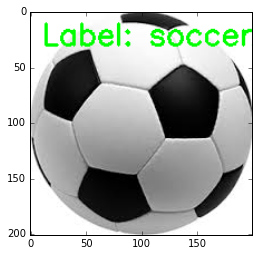

In [40]:
plt.imshow(orig)

# ImageNet validation data

In [152]:
validation_folder = "../ILSVRC2013_DET_val/"
image_path = "ILSVRC2012_val_00000001.JPEG"
label = 'n01726692'

image_path = "ILSVRC2012_val_00005099.JPEG"
label = 'n02484322'


img_path = validation_folder + image_path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

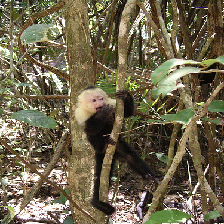

In [153]:
img

In [151]:
preds = model.predict(x)
val_truth = det_synsets[label]
print('Validation label: {},{},{}'.format(val_truth['id'],val_truth['wnid'],val_truth['name']))
print('Predicted:', decode_predictions(preds))

Validation label: 113,n02484322,monkey
('Predicted:', [[(u'n02492035', u'capuchin', 0.97459167), (u'n02490219', u'marmoset', 0.014937446), (u'n02493509', u'titi', 0.0047925878), (u'n02443114', u'polecat', 0.003718242), (u'n02441942', u'weasel', 0.00045769301)]])


In [76]:
decode_predictions_det(decode_predictions(preds))

[[('n02484322', u'monkey', 0.97459167),
  ('n02484322', u'monkey', 0.014937446),
  ('n02484322', u'monkey', 0.0047925878),
  (None, None, 0.003718242),
  (None, None, 0.00045769301)]]

In [667]:
def decode_predictions_det(clsloc_pred):
    all_preds = []
    for img in clsloc_pred:
        preds = []
        for el in img:
            if el[0] in clsloc_2_det:
                wnid = clsloc_2_det[el[0]]
                syn = det_synsets[wnid]
                name = syn['name']
                preds.append((wnid,name,el[2]))
            else:
                preds.append((None, None, el[2]))
        all_preds.append(preds)
    return all_preds

def decode_det_category(clsloc_cats):
    det_cats = []
    for cat in clsloc_cats:
        wnid = clsloc_synsets_id[cat]
        if wnid in clsloc_2_det:
            wnid_det = clsloc_2_det[wnid]
            det_cats.append(det_synsets[wnid_det]["id"])
    return det_cats

u'n02096294'

# WordNet relations

In [757]:
# Keras imagenet clsloc index
keras_imagenet_idx = json.load(open("imagenet_class_index.json"))
keras_imagenet_idx["54"]

[u'n01729322', u'hognose_snake']

In [4]:
import scipy.io as sio

In [5]:
# Det synsets
data = sio.loadmat('../ILSVRC2015/devkit/data/meta_det.mat')

det_synsets = {}
det_synsets_id = {}

for i,d in enumerate(data['synsets'][0][:]):
    sid = int(d[0].flatten()[0])
    wnid = d[1][0]
    name = d[2][0]
    desc = d[3][0] if len(d[3])>0 else ""
#     print "Data ",i,": ",d
#     print "Id: ", int(d[0].flatten()[0])
#     print "Wnid: ", d[1][0]
#     print "name: ", d[2][0]
#     print "Desc: ", d[3][0] if len(d[3])>0 else ""
    
    det_synsets[wnid] = {"id": sid, "wnid": wnid, "name": name, "desc": desc}
    det_synsets_id[sid] = wnid
    

In [6]:
# clsloc synsets
data = sio.loadmat('../ILSVRC2015/devkit/data/meta_clsloc.mat')

clsloc_synsets = {}
clsloc_synsets_id = {}

for i,d in enumerate(data['synsets'][0][:]):
    sid = int(d[0].flatten()[0])
    wnid = d[1][0]
    name = d[2][0]
    desc = d[3][0] if len(d[3])>0 else ""
#     print "Data ",i,": ",d
#     print "Id: ", int(d[0].flatten()[0])
#     print "Wnid: ", d[1][0]
#     print "name: ", d[2][0]
#     print "Desc: ", d[3][0] if len(d[3])>0 else ""
    
    clsloc_synsets[wnid] = {"id": sid, "wnid": wnid, "name": name, "desc": desc}
    clsloc_synsets_id[sid] = wnid
    

In [20]:
# CLSLOC (1000 categories) to DET (200 categories)

# Load parent child relation file
with open('../wordnet/wordnet_parent_child.txt') as f:
    parent_child = f.read()

parent_child = parent_child.split('\n')

is_a = {}

for line in parent_child[:]:    
    if line:
        parent, child =  line.split(" ")
        if child in is_a:
#             print "{} was already in list".format(child)
            # Lots repeated ... :(
            pass
            
    #     print child, "is a", parent
        is_a[child] = parent
        
print len(is_a)

n02430830 was already in list
n02403231 was already in list
n02472987 was already in list
n02403740 was already in list
n02403820 was already in list
n02386746 was already in list
n02376918 was already in list
n02090827 was already in list
n02503517 was already in list
n02121808 was already in list
n02384741 was already in list
n02084071 was already in list
n01323068 was already in list
n01862399 was already in list
n01322508 was already in list
n01322898 was already in list
n01322983 was already in list
n01322604 was already in list
n02672831 was already in list
n03140771 was already in list
n04308273 was already in list
n02867715 was already in list
n04308397 was already in list
n03335030 was already in list
n04062644 was already in list
n04552348 was already in list
n04264914 was already in list
n04208760 was already in list
n04487894 was already in list
n04552696 was already in list
n03478589 was already in list
n03919096 was already in list
n04062807 was already in list
n04389033 

In [428]:
notfound = 0

clsloc_2_det = {}
clsloc_2_det_id = {}

for sid in range(1,1001):
    clsloc_wnid = clsloc_synsets_id[sid]
    synset = clsloc_synsets[clsloc_wnid]
    
    found = False
    parent = clsloc_wnid
    
    trace = [parent]
    
    while not found:
        if parent in det_synsets:
            found = True
            parent_syn = det_synsets[parent]
#             print "Found!"
            print("Synset id:{},{},{} is a id:{}, {}, {}".
                  format(synset['id'], synset['wnid'], synset['name'],
                         parent_syn['id'], parent_syn['wnid'], parent_syn['name']))
            clsloc_2_det[clsloc_wnid] = parent
            clsloc_2_det_id[synset['id']] = parent_syn['id']
        else:
            if parent in is_a:
                parent = is_a[parent]
                trace.append(parent)
            else:
                notfound += 1
                print("------------- COULDN't figure out {}, {}, {}".
                     format(synset['id'], synset['wnid'], synset['name']))
                print("------Last parent is: {}. Trace: {}".format(parent, trace))
                break
    if not found:
        pass
    

        
                  
                        
                
    

Synset id:1,n02119789,kit fox, Vulpes macrotis is a id:70, n02118333, fox
Synset id:2,n02100735,English setter is a id:58, n02084071, dog
Synset id:3,n02110185,Siberian husky is a id:58, n02084071, dog
Synset id:4,n02096294,Australian terrier is a id:58, n02084071, dog
Synset id:5,n02102040,English springer, English springer spaniel is a id:58, n02084071, dog
Synset id:6,n02066245,grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus is a id:198, n02062744, whale
Synset id:7,n02509815,lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens is a id:144, n02509815, red panda
Synset id:8,n02124075,Egyptian cat is a id:59, n02121808, domestic cat
------------- COULDN't figure out 9, n02417914, ibex, Capra ibex
------Last parent is: n00001740. Trace: [u'n02417914', 'n02417534', 'n02416519', 'n02401031', 'n02399000', 'n02394477', 'n02370806', 'n01886756', 'n01861778', 'n01471682', 'n01466257', 'n00015388', 'n00004475', 'n00004258', 'n00003553', 'n0000268

In [430]:
print notfound
print "Found: ", len(clsloc_2_det.keys())

529
Found:  471


In [33]:
clsloc_2_det_id

{1: 70,
 2: 58,
 3: 58,
 4: 58,
 5: 58,
 6: 198,
 7: 144,
 8: 59,
 10: 59,
 12: 4,
 13: 134,
 14: 154,
 15: 58,
 17: 58,
 18: 58,
 19: 58,
 21: 58,
 22: 198,
 24: 64,
 25: 58,
 26: 58,
 27: 58,
 29: 58,
 31: 58,
 32: 58,
 33: 58,
 36: 58,
 37: 113,
 39: 92,
 41: 58,
 42: 58,
 43: 58,
 44: 157,
 45: 58,
 46: 58,
 47: 58,
 49: 58,
 50: 58,
 51: 58,
 53: 166,
 54: 113,
 55: 59,
 56: 58,
 57: 4,
 59: 58,
 60: 58,
 61: 20,
 62: 70,
 63: 58,
 64: 58,
 65: 4,
 66: 58,
 67: 70,
 68: 58,
 69: 58,
 70: 58,
 71: 58,
 72: 58,
 73: 113,
 76: 182,
 77: 58,
 78: 175,
 79: 58,
 80: 200,
 81: 155,
 82: 58,
 84: 58,
 86: 58,
 87: 58,
 88: 58,
 89: 58,
 90: 58,
 91: 58,
 92: 113,
 93: 58,
 94: 58,
 95: 59,
 97: 58,
 98: 58,
 99: 58,
 100: 113,
 103: 20,
 105: 58,
 106: 58,
 107: 58,
 108: 39,
 109: 58,
 110: 58,
 111: 113,
 112: 58,
 113: 58,
 114: 58,
 115: 58,
 116: 58,
 117: 58,
 118: 58,
 119: 58,
 120: 175,
 121: 35,
 123: 58,
 124: 58,
 125: 58,
 126: 58,
 127: 58,
 128: 58,
 130: 58,
 131: 58,
 13

In [38]:
clsloc_2_det

{u'n01443537': u'n01443537',
 u'n01496331': 'n01495701',
 u'n01498041': 'n01495701',
 u'n01514668': 'n01503061',
 u'n01514859': 'n01503061',
 u'n01518878': 'n01503061',
 u'n01530575': 'n01503061',
 u'n01531178': 'n01503061',
 u'n01532829': 'n01503061',
 u'n01534433': 'n01503061',
 u'n01537544': 'n01503061',
 u'n01558993': 'n01503061',
 u'n01560419': 'n01503061',
 u'n01580077': 'n01503061',
 u'n01582220': 'n01503061',
 u'n01592084': 'n01503061',
 u'n01601694': 'n01503061',
 u'n01608432': 'n01503061',
 u'n01614925': 'n01503061',
 u'n01616318': 'n01503061',
 u'n01622779': 'n01503061',
 u'n01641577': 'n01639765',
 u'n01644373': 'n01639765',
 u'n01644900': 'n01639765',
 u'n01664065': 'n01662784',
 u'n01665541': 'n01662784',
 u'n01667114': 'n01662784',
 u'n01667778': 'n01662784',
 u'n01669191': 'n01662784',
 u'n01675722': 'n01674464',
 u'n01677366': 'n01674464',
 u'n01682714': 'n01674464',
 u'n01685808': 'n01674464',
 u'n01687978': 'n01674464',
 u'n01688243': 'n01674464',
 u'n01689811': 'n01

In [37]:
print len(set(clsloc_2_det_id.values()))
print max(clsloc_2_det_id.values())
print min(clsloc_2_det_id.values())

200
200
1


In [435]:
list.sort?

dog (n02084071) has 116 categories in clsloc.
bird (n01503061) has 52 categories in clsloc.
snake (n01726692) has 17 categories in clsloc.
monkey (n02484322) has 13 categories in clsloc.
watercraft (n04530566) has 13 categories in clsloc.
lizard (n01674464) has 11 categories in clsloc.
car (n02958343) has 10 categories in clsloc.
butterfly (n02274259) has 6 categories in clsloc.
domestic cat (n02121808) has 5 categories in clsloc.
turtle (n01662784) has 5 categories in clsloc.
chair (n03001627) has 4 categories in clsloc.
fox (n02118333) has 4 categories in clsloc.
bear (n02131653) has 4 categories in clsloc.
person (n00007846) has 3 categories in clsloc.
cart (n02970849) has 3 categories in clsloc.
antelope (n02419796) has 3 categories in clsloc.
baby bed (n02766320) has 3 categories in clsloc.
bus (n02924116) has 3 categories in clsloc.
swine (n02395003) has 3 categories in clsloc.
frog (n01639765) has 3 categories in clsloc.



violin (n04536866) has 1 categories in clsloc.
hamster 

(array([ 170.,   10.,    7.,    3.,    2.,    1.,    0.,    0.,    0.,
           1.,    1.,    0.,    2.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15

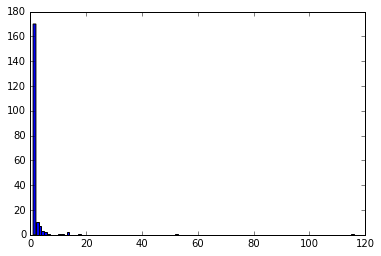

In [461]:
# Figure out how many of the 1000 clsloc classes map into the 200 det ones
# and how many of the det ones are not covered in the 1000 classes (-- all are covered)
det_num_clsloc = {}
for wnid in det_synsets_id.values(): det_num_clsloc[wnid] = 0
for wnid,parentid in clsloc_2_det.items():
    det_num_clsloc[parentid] += 1

det_nums_list = list(det_num_clsloc.items())
det_nums_list.sort(key=lambda x: x[1])
det_nums_list = det_nums_list[::-1]
# print_wnid = lambda x: print("{} ({}) has {} categories in clsloc.".
#                              format(det_synsets[x[0]]['name'],x[0],x[1]))
for wnid in det_nums_list[:20]:
    print("{} ({}) has {} categories in clsloc.".
                             format(det_synsets[wnid[0]]['name'],wnid[0],wnid[1]))
print "\n\n"
for wnid in det_nums_list[-10:]:
    print("{} ({}) has {} categories in clsloc.".
                             format(det_synsets[wnid[0]]['name'],wnid[0],wnid[1]))    
plt.hist(det_num_clsloc.values(), bins=range(1,max(det_num_clsloc.values())+1))

In [458]:
plt.hist?

In [426]:
len(clsloc_2_det.keys())

471

# Access all validation images and labels

In [77]:
val_img_folder = "../ILSVRC2013_DET_val/"
val_annot_folder = "../ILSVRC2013_DET_bbox_val/"
val_idx_path = "../ILSVRC2014_devkit/data/det_lists/val.txt"

In [83]:
with open(val_idx_path) as f:
    val_idx_str = f.read().split("\n")

In [99]:
# Read index -> val image file
val_idx = {}
for line in val_idx_str:
    line = line.strip()
    if line:
        v_name, v_idx = line.split(" ")
        val_idx[int(v_idx)] = v_name
        

In [111]:
import attr

@attr.s
class ObjectAnnotation(object):
    wnid = attr.ib()
    synset = attr.ib()
    xmin = attr.ib()
    xmax = attr.ib()
    ymin = attr.ib()
    ymax = attr.ib()

@attr.s
class ValImage(object):
    idx = attr.ib()
    img_path = attr.ib()
    objects = attr.ib()
    width = attr.ib()
    height = attr.ib()

In [116]:
# Read img metadata
import xml.etree.ElementTree as ET

def read_val_metadata(idx):
    data_xml = val_annot_folder + val_idx[idx] + ".xml"
    tree = ET.parse(data_xml)
    root = tree.getroot()
    filename = root.findall('filename')[0].text
    img_path = val_img_folder + filename + ".JPEG"
    size = root.findall('size')[0]
    width = int(size.findall('width')[0].text)
    height = int(size.findall('height')[0].text)
    all_obj = root.findall('object')
    objects = []
    for ob in all_obj:
        wnid = ob.findall('name')[0].text
        bndbox = ob.findall('bndbox')[0]
        xmin, xmax, ymin, ymax = [int(bndbox.findall(tag)[0].text) for tag in ['xmin','xmax','ymin','ymax']]
        objects.append(ObjectAnnotation(wnid=wnid, synset=det_synsets[wnid],
                                       xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax))
    return ValImage(idx=idx, img_path=img_path, objects=objects, width=width, height=height)

In [117]:
read_val_metadata(1)

ValImage(idx=1, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00000001.JPEG', objects=[ObjectAnnotation(wnid='n01726692', synset={'wnid': u'n01726692', 'desc': u' please do not confuse with lizard (snakes do not have legs)', 'id': 159, 'name': u'snake'}, xmin=111, xmax=441, ymin=108, ymax=193)], width=500, height=375)

In [120]:
val_data = {}
for idx in sorted(val_idx.keys()):
    val_data[idx] = read_val_metadata(idx)

In [121]:
len(val_data)

20121

In [123]:
import pickle

In [127]:
# Save pickle
# with open('val_data.pickle', 'w') as f:
#     pickle.dump(val_data, f)

In [128]:
# Read pickle -- several seconds
with open('val_data.pickle') as f:
    val_data = pickle.load(f)

In [129]:
val_data[15]

ValImage(idx=15, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00000046.JPEG', objects=[ObjectAnnotation(wnid='n04379243', synset={'wnid': u'n04379243', 'id': 177, 'name': u'table', 'desc': ''}, xmin=7, xmax=498, ymin=195, ymax=402), ObjectAnnotation(wnid='n03950228', synset={'wnid': u'n03950228', 'id': 128, 'name': u'pitcher', 'desc': u' a vessel with a handle and a spout for pouring'}, xmin=173, xmax=348, ymin=29, ymax=287)], width=500, height=424)

In [511]:
def get_val_img(idx, size=None):
    val = val_data[idx]
    if size==None:
        size=(val.height, val.width)    
    img_path = val.img_path
    img = image.load_img(img_path, target_size=size)
    return img, val

def display_val(idx):    
    img, val = get_val_img(idx)
    print("width: {}, height: {}".format(val.width, val.height))
    for i,ob in enumerate(val.objects):
        print("Object {}: {}, {}".format(i, ob.wnid, ob.synset["name"]))
    return img

def display_cv(idx):
    val = val_data[idx]
    img_path = val.img_path
    img = cv2.imread(img_path)
    for i,ob in enumerate(val.objects):
        print("Object {}: {}, {}".format(i, ob.wnid, ob.synset["name"]))
        minx,miny,maxx,maxy = ob.xmin, ob.ymin, ob.xmax, ob.ymax
        cv2.rectangle(img,(minx,miny),(maxx,maxy),(0,255,0),2)
    plt.imshow(img)
    
def classify_img(img):
    # Resize image
    img = cv2.resize(img,(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    #val_truth = det_synsets[label]
    clsloc_preds = decode_predictions(preds)
    det_preds = decode_predictions_det(clsloc_preds)
    #print('Validation label: {},{},{}'.format(val_truth['id'],val_truth['wnid'],val_truth['name']))
#     print('Predicted clsloc:', clsloc_preds)
#     print('Predicted det:', det_preds)
    return preds, det_preds, clsloc_preds    

def classify_val(idx):
    img, val = get_val_img(idx, size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    #val_truth = det_synsets[label]
    clsloc_preds = decode_predictions(preds)
    det_preds = decode_predictions_det(clsloc_preds)
    #print('Validation label: {},{},{}'.format(val_truth['id'],val_truth['wnid'],val_truth['name']))
    print('Predicted clsloc:', clsloc_preds)
    print('Predicted det:', det_preds)
    return preds, det_preds, clsloc_preds    

def nice_preds(res):
    det = res[1]
    all_nice_pred = []
    for img in det:
        nice_pred = []
        for p in img:    
            if p[0]:
                nice_pred.append("{} ({})".format(p[1],p[0]))
        all_nice_pred.append(nice_pred)

    clsloc = res[2]    
    all_nice_cslsoc = []
    for img in clsloc:
        nice_cslsoc = []
        for p in img:
            nice_cslsoc.append("{} ({})".format(p[1],p[0]))
        all_nice_cslsoc.append(nice_cslsoc)
    return zip(all_nice_pred, all_nice_cslsoc)

Object 0: n00007846, person
Object 1: n02992211, cello
Object 2: n04536866, violin
Object 3: n03001627, chair
Object 4: n03001627, chair


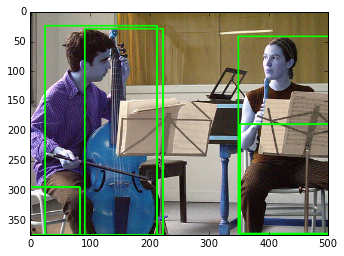

In [195]:
display_cv(1543)

('Predicted clsloc:', [[(u'n01729322', u'hognose_snake', 0.40136686), (u'n01697457', u'African_crocodile', 0.19644699), (u'n01751748', u'sea_snake', 0.17972641), (u'n01755581', u'diamondback', 0.095509887), (u'n01756291', u'sidewinder', 0.042873912)]])
('Predicted det:', [[('n01726692', u'snake', 0.40136686), (None, None, 0.19644699), ('n01726692', u'snake', 0.17972641), ('n01726692', u'snake', 0.095509887), ('n01726692', u'snake', 0.042873912)]])
Object 0: n01726692, snake


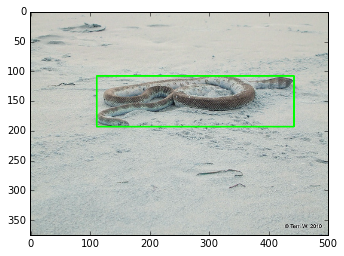

In [205]:
val_idx = 1
res = classify_val(val_idx)
display_cv(val_idx)

('Predicted clsloc:', [[(u'n03788365', u'mosquito_net', 0.25866792), (u'n04442312', u'toaster', 0.14568995), (u'n04590129', u'window_shade', 0.1299967), (u'n04589890', u'window_screen', 0.063217126), (u'n02808440', u'bathtub', 0.057035383)]])
('Predicted det:', [[(None, None, 0.25866792), (u'n04442312', u'toaster', 0.14568995), (None, None, 0.1299967), (None, None, 0.063217126), (None, None, 0.057035383)]])
Object 0: n04442312, toaster


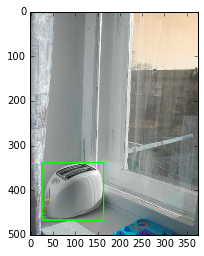

In [207]:
val_idx = 1341
res = classify_val(val_idx)
display_cv(val_idx)

('Predicted clsloc:', [[(u'n03124170', u'cowboy_hat', 0.51662475), (u'n04259630', u'sombrero', 0.47822326), (u'n03124043', u'cowboy_boot', 0.0015220275), (u'n02641379', u'gar', 0.00068531692), (u'n02787622', u'banjo', 0.00047254606)]])
('Predicted det:', [[(u'n03124170', u'hat with a wide brim', 0.51662475), (None, None, 0.47822326), (None, None, 0.0015220275), (None, None, 0.00068531692), (u'n02787622', u'banjo', 0.00047254606)]])
Object 0: n00007846, person
Object 1: n03124170, hat with a wide brim


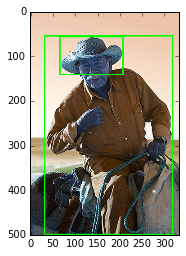

In [213]:
val_idx = 1565
res = classify_val(val_idx)
display_cv(val_idx)

In [173]:
res = classify_val(1)

('Predicted clsloc:', [[(u'n01729322', u'hognose_snake', 0.40136686), (u'n01697457', u'African_crocodile', 0.19644699), (u'n01751748', u'sea_snake', 0.17972641), (u'n01755581', u'diamondback', 0.095509887), (u'n01756291', u'sidewinder', 0.042873912)]])
('Predicted det:', [[('n01726692', u'snake', 0.40136686), (None, None, 0.19644699), ('n01726692', u'snake', 0.17972641), ('n01726692', u'snake', 0.095509887), ('n01726692', u'snake', 0.042873912)]])


# Select images with only one object

And having a tag that can be classified by the 1000 class system

In [218]:
len(val_data[2].objects)

1

In [234]:
val_data_single = {}
single_idx = []
for i,v in enumerate(val_data.values()):
    if len(v.objects) == 1:
        val_data_single[i] = v
        single_idx.append(v.idx)
num_single = len(single_idx)        

In [414]:
num_single

7706

In [226]:
single_idx[6058]

14181

('Predicted clsloc:', [[(u'n01644373', u'tree_frog', 0.78647518), (u'n01644900', u'tailed_frog', 0.21088667), (u'n01641577', u'bullfrog', 0.0025320763), (u'n02177972', u'weevil', 2.8884941e-05), (u'n01694178', u'African_chameleon', 1.9545834e-05)]])
('Predicted det:', [[('n01639765', u'frog', 0.78647518), ('n01639765', u'frog', 0.21088667), ('n01639765', u'frog', 0.0025320763), (None, None, 2.8884941e-05), ('n01674464', u'lizard', 1.9545834e-05)]])
Object 0: n01639765, frog


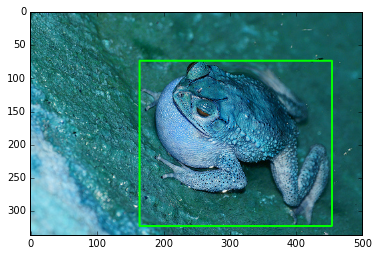

In [256]:
val_idx = single_idx[np.random.randint(0,num_single)]
res = classify_val(val_idx)
display_cv(val_idx)

In [ ]:

res = classify_val(val_idx)
display_cv(val_idx)

# Display bounding boxes

# Apply noise inside bounding box

Object 0: n02268443, dragonfly


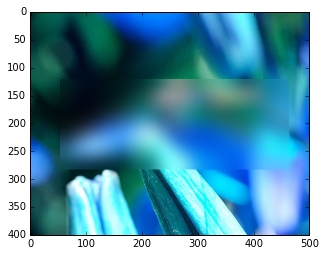

In [333]:
idx = single_idx[15]
idx = single_idx[195] # monkey
idx = single_idx[6352]
val = val_data[idx]
img_path = val.img_path
img = cv2.imread(img_path)

img_blur = np.array(img)


ob = val.objects[0]
print("Object {}: {}, {}".format(i, ob.wnid, ob.synset["name"]))
minx,miny,maxx,maxy = ob.xmin, ob.ymin, ob.xmax, ob.ymax
img_rect = img[miny:maxy,minx:maxx]

img2 = cv2.GaussianBlur(img_rect, (55,55), 15.5)    

img_blur[miny:maxy,minx:maxx] = img2
# cv2.rectangle(img,(minx,miny),(maxx,maxy),(0,255,0),2)

    
# plt.imshow(img)
plt.imshow(img_blur)

(['dragonfly (n02268443)', 'bee (n02206856)'], ['dragonfly (n02268443)', 'damselfly (n02268853)', 'fly (n02190166)', 'lacewing (n02264363)', 'bee (n02206856)'])


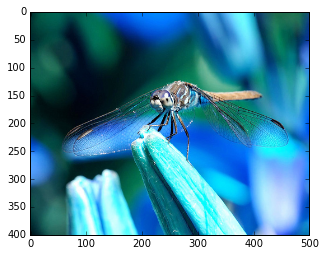

In [401]:
print nice_preds(classify_img(img))
plt.imshow(img)

('Predicted clsloc:', [[(u'n03944341', u'pinwheel', 0.37464702), (u'n03729826', u'matchstick', 0.10528777), (u'n04118776', u'rule', 0.047819704), (u'n02219486', u'ant', 0.042591333), (u'n04116512', u'rubber_eraser', 0.032711871)]])
('Predicted det:', [[(None, None, 0.37464702), (None, None, 0.10528777), (u'n04118776', u'ruler', 0.047819704), (u'n02219486', u'ant', 0.042591333), (u'n04116512', u'rubber eraser', 0.032711871)]])


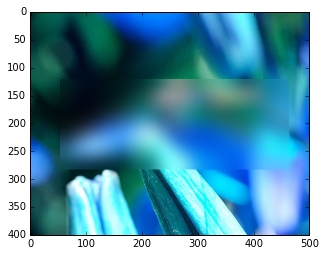

In [335]:
_ = classify_img(img_blur)
plt.imshow(img_blur)

In [292]:
img_pil = get_val_img(single_idx[15])[0]
x = image.img_to_array(img_pil)
x.dtype

dtype('float32')

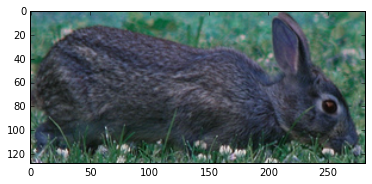

In [278]:
plt.imshow(img_rect)

In [246]:
cv2.filter2D?

In [247]:
cv2.GaussianBlur?

In [296]:
image.img_to_array(img).dtype

dtype('float32')

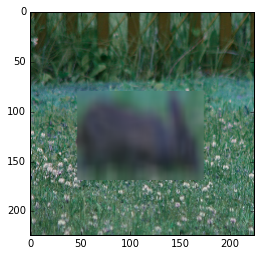

In [303]:
plt.imshow(cv2.resize(img,(224, 224)))

In [362]:
# Bounding box functions
def bounding_box_size(w,h,covered=0.5):
    scale = np.sqrt(covered)
    return int(scale*w), int(scale*h)

def center_bounding(bb,c=0.5):
    minx, miny, maxx, maxy = bb
    w, h = maxx-minx, maxy-miny
    nw,nh = bounding_box_size(maxx-minx, maxy-miny, covered=c)
    x_off, y_off = int((w-nw)/2), int((h-nh)/2)
    print("w:{}, h:{}, nw:{}, nh:{}, x:{}, y:{}".
         format(w,h, nw, nh, x_off, y_off))
    return minx+x_off, miny+y_off, minx+x_off+nw, miny+y_off+nh


Object 0: n02268443, dragonfly
w:409, h:162, nw:289, nh:114, x:60, y:24


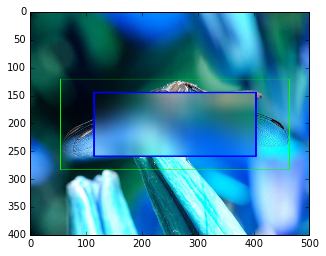

In [367]:
idx = single_idx[15]
idx = single_idx[195] # monkey
idx = single_idx[6352]
val = val_data[idx]
img_path = val.img_path
img = cv2.imread(img_path)

img_blur = np.array(img)


ob = val.objects[0]
print("Object {}: {}, {}".format(i, ob.wnid, ob.synset["name"]))
noise_bb = center_bounding((ob.xmin, ob.ymin, ob.xmax, ob.ymax),0.5)
minx,miny,maxx,maxy = noise_bb
img_rect = img[miny:maxy,minx:maxx]

img2 = cv2.GaussianBlur(img_rect, (55,55), 55.5)    

img_blur[miny:maxy,minx:maxx] = img2
minx,miny,maxx,maxy = ob.xmin, ob.ymin, ob.xmax, ob.ymax
cv2.rectangle(img_blur,(minx,miny),(maxx,maxy),(0,255,0),1)
minx,miny,maxx,maxy = noise_bb
cv2.rectangle(img_blur,(minx,miny),(maxx,maxy),(0,0,255),2)

    
# plt.imshow(img)
plt.imshow(img_blur)

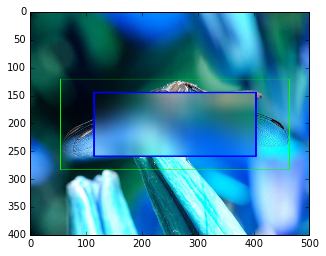

In [391]:
res = classify_img(img_blur)
plt.imshow(img_blur)

In [398]:
res[2]

[[(u'n03782006', u'monitor', 0.70495069),
  (u'n04152593', u'screen', 0.066515043),
  (u'n03180011', u'desktop_computer', 0.036641534),
  (u'n03832673', u'notebook', 0.032896046),
  (u'n03804744', u'nail', 0.017730808)]]

# Measure performance across different models

In [287]:
img.dtype

dtype('uint8')

# Image examples

In [514]:
def example_img_center_blur(idx, pct=.5):    
    val = val_data[idx]
    img_path = val.img_path
    img = cv2.imread(img_path)

    img_blur = np.array(img)


    ob = val.objects[0]
    print("Object {}: {}, {}".format(i, ob.wnid, ob.synset["name"]))
    noise_bb = center_bounding((ob.xmin, ob.ymin, ob.xmax, ob.ymax),pct)
    minx,miny,maxx,maxy = noise_bb
    img_rect = img[miny:maxy,minx:maxx]

    img2 = cv2.GaussianBlur(img_rect, (55,55), 55.5)    

    img_blur[miny:maxy,minx:maxx] = img2
    
#     # Classify original
    res_ori = nice_preds(classify_img(img))
    res_ori = res_ori[0]
    
#     # Classify blurred
    res_blur = nice_preds(classify_img(img_blur))
    res_blur = res_blur[0]
    
    # Show rectangles
    minx,miny,maxx,maxy = ob.xmin, ob.ymin, ob.xmax, ob.ymax
    cv2.rectangle(img,(minx,miny),(maxx,maxy),(0,255,0),2)
    minx,miny,maxx,maxy = noise_bb
    cv2.rectangle(img,(minx,miny),(maxx,maxy),(0,0,255),2)
    
    print("\nOriginal predictions:\n DET: {}\n CLSLOC: {}\n".format(" ".join(res_ori[0]),
                                                               " ".join(res_ori[1]),))
    print("Blurred predictions:\n DET: {}\n CLSLOC: {}".format(" ".join(res_blur[0]),
                                                               " ".join(res_blur[1]),))    

    
    # plt.imshow(img)
    plt.figure(figsize=(12,4))    
    plt.subplot(1,2,1)
    plt.imshow(img)
#     plt.title(" ".join(res_ori[0]))
    
    plt.subplot(1,2,2)
    plt.imshow(img_blur)
#     plt.title(" ".join(res_blur[0]))    
    
    plt.suptitle("Ground truth: {} ({})".format(ob.synset["name"], ob.wnid))

Object 9: n02268443, dragonfly
w:409, h:162, nw:365, nh:144, x:22, y:9

Original predictions:
 DET: dragonfly (n02268443) bee (n02206856)
 CLSLOC: dragonfly (n02268443) damselfly (n02268853) fly (n02190166) lacewing (n02264363) bee (n02206856)

Blurred predictions:
 DET: ant (n02219486)
 CLSLOC: pinwheel (n03944341) ant (n02219486) matchstick (n03729826) paintbrush (n03876231) monitor (n03782006)


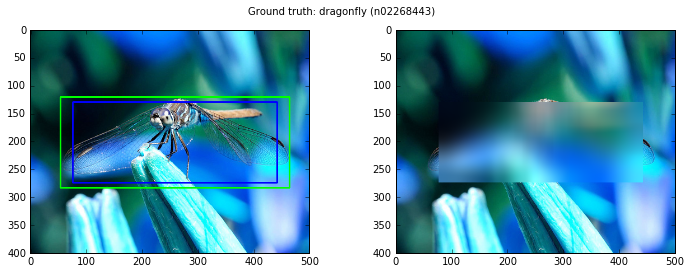

In [515]:
idx = single_idx[15]
idx = single_idx[195] # monkey
idx = single_idx[6352]
example_img_center_blur(idx,.8)

Single idx: 2255
Object 4: n01503061, bird
w:304, h:232, nw:214, nh:164, x:45, y:34

Original predictions:
 DET: antelope (n02419796) bird (n01503061) dog (n02084071) dog (n02084071)
 CLSLOC: impala (n02422699) crane (n02012849) fiddler_crab (n01980166) Ibizan_hound (n02091244) vizsla (n02100583)

Blurred predictions:
 DET: bird (n01503061) antelope (n02419796) antelope (n02419796)
 CLSLOC: prairie_chicken (n01798484) crane (n02012849) gazelle (n02423022) impala (n02422699) partridge (n01807496)


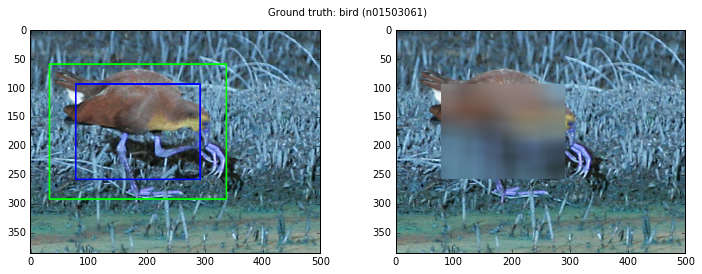

In [539]:
sidx = np.random.randint(0, num_single)
idx = single_idx[15]
idx = single_idx[195] # monkey
idx = single_idx[6352]
idx = single_idx[sidx]
print("Single idx: {}".format(sidx))
example_img_center_blur(idx,.5)

In [419]:
2+2

4

# Generating predictions

In [469]:
np.zeros?

In [540]:
start_t = time.time()
print("Preprocessing...")
batch_size = 10
batch_idx = np.random.randint(0, num_single, batch_size)
batch = np.zeros((batch_size, 224, 224, 3))
# print batch_idx
for i, idx in enumerate(batch_idx):    
    img, val = get_val_img(idx, size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    batch[i, ...] = x
print("Preproccessed in {:.2f} seconds.".format(time.time()-start_t))
start_t = time.time()
print("Predicting on batch of size {}...".format(batch_size))
preds = model.predict_on_batch(batch)
print("Done!. Predicted in {:.2f} seconds".format(time.time()-start_t))
    

Preprocessing...
Preproccessed in 0.17 seconds.
Predicting on batch of size 10...
Done!. Predicted in 17.41 seconds


In [554]:
a = [2,5,9,12,12, 19]
a[1:2]

[5]

In [555]:
def prepare_batch(start_idx, batch_size):
    if start_idx + batch_size >= num_single:
        batch_size = num_single - start_idx
    batch = np.zeros((batch_size, 224, 224, 3))
    # print batch_idx
    for i, idx in enumerate(single_idx[start_idx:start_idx+batch_size]):    
        img, val = get_val_img(idx, size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        batch[i, ...] = x
    return batch
    

In [559]:
num_single

7706

In [592]:
batch_size = 20
num_batches = int(np.ceil(num_single/batch_size))
overall_t = time.time()
# num_batches=2
img_processed = 0
h5_name = "test.h5"
f_h5 = h5py.File(h5_name, "w")
print("Opened {} h5 file".format(h5_name))

pred_dataset = f_h5.create_dataset("predictions", (num_single, 1000), dtype='float64')
top5_dataset = f_h5.create_dataset("top_5", (num_single, 5), dtype='i')

# predictions = np.zeros((num_single,1000))
for i in range(num_batches):
    start_t = time.time()
    print("Preproccessing batch ({}/{})...".format(i+1, num_batches))
    batch = prepare_batch(img_processed, batch_size)
    num_img = len(batch)
    print("\t\tPreproccessed {} img in {:.2f} seconds.".format(num_img,time.time()-start_t))
    print("Predicting batch ({}/{}) of size {}...".format(i+1, num_batches, num_img))
    start_t = time.time()
    preds = model.predict_on_batch(batch)
    
    for j,img_pred in enumerate(preds):
        best_5 = img_pred.argsort()[::-1][:5] # In Keras id numbers, not mine
        best_5 = [keras_imagenet_idx[str(idx)][0] for idx in best_5] # wnids
        best_5 = [clsloc_synsets[c]["id"] for c in best_5]
#         print("Best 5: ", best_5)
        top5_dataset[img_processed+j, ...] = best_5
    
    pred_dataset[img_processed:img_processed+num_img, ...] = preds
    print("\t\tDone!. Predicted in {:.2f} seconds".format(time.time()-start_t))
    img_processed += num_img

print("\nFinishing predicting all {} images in {:.2f} seconds".format(img_processed, time.time()-overall_t))
f_h5.close()

Opened test.h5 h5 file
Preproccessing batch (1/386)...
		Preproccessed 20 img in 0.34 seconds.
Predicting batch (1/386) of size 20...
		Done!. Predicted in 9.37 seconds
Preproccessing batch (2/386)...
		Preproccessed 20 img in 0.35 seconds.
Predicting batch (2/386) of size 20...
		Done!. Predicted in 7.22 seconds
Preproccessing batch (3/386)...
		Preproccessed 20 img in 0.70 seconds.
Predicting batch (3/386) of size 20...
		Done!. Predicted in 7.39 seconds
Preproccessing batch (4/386)...
		Preproccessed 20 img in 0.35 seconds.
Predicting batch (4/386) of size 20...
		Done!. Predicted in 7.03 seconds
Preproccessing batch (5/386)...
		Preproccessed 20 img in 0.36 seconds.
Predicting batch (5/386) of size 20...
		Done!. Predicted in 7.05 seconds
Preproccessing batch (6/386)...
		Preproccessed 20 img in 0.41 seconds.
Predicting batch (6/386) of size 20...
		Done!. Predicted in 7.18 seconds
Preproccessing batch (7/386)...
		Preproccessed 20 img in 0.37 seconds.
Predicting batch (7/386) of s

In [760]:
x = prepare_batch(0,1)
preds = model.predict_on_batch(x)
for j,img_pred in enumerate(preds):
        best_5 = [keras_imagenet_idx[str(idx)][0] for idx in img_pred.argsort()[::-1][:5]]
        print("Best 5: ", best_5)
        names = [clsloc_synsets[x]["name"] for x in best_5]
        print names
        det_cats = decode_det_category([clsloc_synsets[c]["id"] for c in best_5])
        print det_cats
        names = [det_synsets[det_synsets_id[x]]["name"] for x in det_cats]
        print names

('Best 5: ', [u'n01729322', u'n01697457', u'n01751748', u'n01755581', u'n01756291'])
[u'hognose snake, puff adder, sand viper', u'African crocodile, Nile crocodile, Crocodylus niloticus', u'sea snake', u'diamondback, diamondback rattlesnake, Crotalus adamanteus', u'sidewinder, horned rattlesnake, Crotalus cerastes']
[159, 159, 159, 159]
[u'snake', u'snake', u'snake', u'snake']


In [762]:
clsloc_synsets['n01697457']

{'desc': u'a dangerous crocodile widely distributed in Africa',
 'id': 475,
 'name': u'African crocodile, Nile crocodile, Crocodylus niloticus',
 'wnid': u'n01697457'}

In [743]:
decode_predictions(preds)

[[(u'n01729322', u'hognose_snake', 0.40136686),
  (u'n01697457', u'African_crocodile', 0.19644699),
  (u'n01751748', u'sea_snake', 0.17972641),
  (u'n01755581', u'diamondback', 0.095509887),
  (u'n01756291', u'sidewinder', 0.042873912)]]

In [740]:
np.argsort?

In [739]:
preds[0][54]

0.40136686

In [742]:
preds[0].argsort()

array([54, 49, 65, 67, 68])

In [727]:
clsloc_synsets[clsloc_synsets_id[68]]

{'desc': u'breed of small stocky black dogs originally used as watchdogs on boats in the Netherlands and Belgium',
 'id': 68,
 'name': u'schipperke',
 'wnid': u'n02104365'}

In [747]:
from keras.applications import imagenet_utils

In [751]:
print imagenet_utils.CLASS_INDEX

None


In [724]:
decode_predictions(preds)

[[(u'n01729322', u'hognose_snake', 0.40136427),
  (u'n01697457', u'African_crocodile', 0.19644722),
  (u'n01751748', u'sea_snake', 0.17972782),
  (u'n01755581', u'diamondback', 0.095510185),
  (u'n01756291', u'sidewinder', 0.042873964)],
 [(u'n01751748', u'sea_snake', 0.36153731),
  (u'n01755581', u'diamondback', 0.26616022),
  (u'n01729322', u'hognose_snake', 0.067308806),
  (u'n01756291', u'sidewinder', 0.066292845),
  (u'n01753488', u'horned_viper', 0.052632045)],
 [(u'n02346627', u'porcupine', 0.9982844),
  (u'n01872401', u'echidna', 0.0010957438),
  (u'n02138441', u'meerkat', 0.00025201362),
  (u'n02447366', u'badger', 0.00015608445),
  (u'n02445715', u'skunk', 3.2191238e-05)]]

In [ ]:
# preds[0][42]

In [673]:
print best_5
names = [clsloc_synsets[clsloc_synsets_id[x]]["name"] for x in best_5]
print names
det_cats = decode_det_category(best_5)
print det_cats
names = [clsloc_synsets[clsloc_synsets_id[x]]["name"] for x in det_cats]
print names

[360 357 337 344 150]
[u'valley, vale', u'daisy', u'gong, tam-tam', u'harp', u'Brittany spaniel']
[86, 58]
[u'Bernese mountain dog', u'coyote, prairie wolf, brush wolf, Canis latrans']


In [586]:
f_h5 = h5py.File(h5_name, "r")
pred_dataset = f_h5["predictions"]
top5_dataset = f_h5["top_5"]
top5_idx = pred_dataset[8].argsort()[::-1][:5]
top5_val = pred_dataset[8][top5_idx]
print top5_idx
print top5_val
print top5_dataset[8]

f_h5.close()

[26 27 29 40 25]
[ 0.86054021  0.05960575  0.05511374  0.00344859  0.00334669]
[26 27 29 40 25]


### Data Ground Truth

In [613]:
# Generate Ground truth
val_img = val_data[single_idx[7500]]
val_img.objects[0].synset["id"]
val_img

ValImage(idx=19216, img_path='../ILSVRC2013_DET_val/ILSVRC2013_val_00003694.JPEG', objects=[ObjectAnnotation(wnid='n03271574', synset={'wnid': u'n03271574', 'id': 63, 'name': u'electric fan', 'desc': u' a device for creating a current of air by movement of a surface or surfaces (please do not consider hair dryers)'}, xmin=0, xmax=331, ymin=102, ymax=498)], width=333, height=500)

In [619]:
groundtruth = np.zeros(num_single, dtype='uint8')
with open("val.txt", "w") as f:
    for i, idx in enumerate(single_idx):
        val_img = val_data[idx]
        label = val_img.objects[0].synset["id"]
        groundtruth[i] = label
        f.write("{} {:d}\n".format(val_img.img_path, label))

In [679]:
det_synsets[det_synsets_id[58]]

{'desc': u' domestic dog, canis familiaris',
 'id': 58,
 'name': u'dog',
 'wnid': u'n02084071'}

Single idx: 2255
Object 7705: n01726692, snake
w:253, h:75, nw:178, nh:53, x:37, y:11

Original predictions:
 DET: snake (n01726692) snake (n01726692) snake (n01726692) snake (n01726692) snake (n01726692)
 CLSLOC: sea_snake (n01751748) night_snake (n01740131) hognose_snake (n01729322) rock_python (n01744401) diamondback (n01755581)

Blurred predictions:
 DET: bench (n02828884)
 CLSLOC: mailbox (n03710193) maze (n03733281) ashcan (n02747177) fountain (n03388043) park_bench (n03891251)


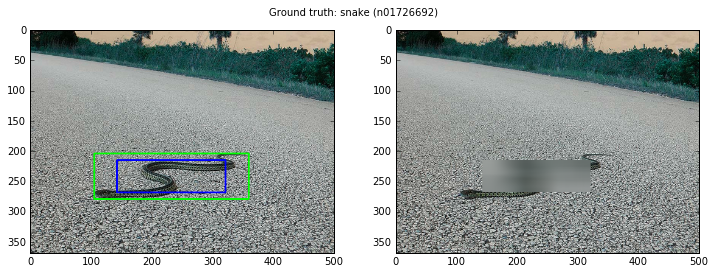

In [711]:
idx = single_idx[1]
print("Single idx: {}".format(sidx))
example_img_center_blur(idx,.5)

In [694]:
[det_synsets[det_synsets_id[x]]["name"] for x in [groundtruth[100]]]

[u'monkey']

In [702]:
# Test accuracy
data = np.array([[4, 3],[2,5],[9,8]])
label = np.array([[3],[0],[1]])
np.sum(np.in1d(label, data))

f_h5 = h5py.File(h5_name, "r")
top5_dataset = f_h5["top_5"]
best_5 = top5_dataset[300,:]
print best_5
names = [clsloc_synsets[clsloc_synsets_id[x]]["name"] for x in best_5]
print names
det_cats = decode_det_category(best_5)
print det_cats
names = [det_synsets[det_synsets_id[x]]["name"] for x in det_cats]
print names
# print(len(top5_dataset[0]))
# matches = np.in1d(groundtruth,top5_dataset[:,4])
f_h5.close()

[ 22  21  23  16 127]
[u'killer whale, killer, orca, grampus, sea wolf, Orcinus orca', u'Scottish deerhound, deerhound', u'mink', u'badger', u'affenpinscher, monkey pinscher, monkey dog']
[198, 58, 58]
[u'whale', u'dog', u'dog']


In [661]:
groundtruth.shape

(7706,)

In [660]:
sum(matches)

7677

In [652]:
num_single

7706

In [602]:
det_synsets['n01503061']

{'desc': '', 'id': 26, 'name': u'bird', 'wnid': u'n01503061'}

array([ True, False,  True], dtype=bool)

In [601]:
len(clsloc_synsets.keys())

1000

In [593]:
val_data[14]

ValImage(idx=14, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00000043.JPEG', objects=[ObjectAnnotation(wnid='n01503061', synset={'wnid': u'n01503061', 'id': 26, 'name': u'bird', 'desc': ''}, xmin=128, xmax=420, ymin=43, ymax=378)], width=500, height=409)

In [570]:
!ls -la

total 72940
drwxr-xr-x 20 efernan staff      680 Dec  3 19:13 .
drwxr-xr-x 15 efernan staff      510 Nov 28 00:39 ..
drwxr-xr-x 12 efernan staff      408 Nov 27 10:19 .git
drwxr-xr-x  3 efernan staff      102 Nov 27 09:51 .ipynb_checkpoints
-rw-r--r--  1 efernan staff     1074 Nov 27 09:50 LICENSE
-rw-r--r--  1 efernan staff     3696 Nov 27 09:50 README.md
-rw-r--r--  1 efernan staff     2770 Nov 27 09:50 audio_conv_utils.py
-rw-r--r--  1 efernan staff  3119374 Dec  3 19:13 classification_example.ipynb
-rw-r--r--  1 efernan staff     1566 Nov 27 09:50 imagenet_utils.py
-rw-r--r--  1 efernan staff     1976 Nov 27 09:52 imagenet_utils.pyc
-rw-r--r--  1 efernan staff    12957 Nov 27 09:50 inception_v3.py
-rw-r--r--  1 efernan staff     5898 Nov 27 09:50 music_tagger_crnn.py
-rw-r--r--  1 efernan staff    10598 Nov 27 09:50 resnet50.py
-rw-r--r--  1 efernan staff     8973 Nov 27 09:52 resnet50.pyc
-rw-r--r--  1 efernan staff     4600 Nov 27 09:57 soccer_ball.jpeg
-rw-r--r--  1 efernan staf

In [572]:
print preds[0][147]
print preds[0][89]
print preds[0][203]
print preds[0].argsort()[::-1]
print preds[0].argsort()[::-1][:5]

1.0224e-07
1.68205e-06
3.19743e-07
[319 320  92  42 136  14 318  94  47  88 946  82 395 308 723 141  84  91
 326 313 995 142 131  43 133  17 124  83 311 113 317 815 808 947  40  39
  98  21 522 515 992 132 693 989 134 129 135 986  12 309  46  73  24 998
 879  90 315  97  11  10  74 323 862  72  86 417 988 321  95 975 312 456
 137 517 324 953  18  20 310 282 300 562 211 448 985  15 207 322 904 994
 898  36 899 397 389 128 316 405 472 913 325 114 115 973 733  38 428  80
 948  50 328 611 984 949  85 944 755 396 795 140  44 677 971 216 832 288
 120 791 491  59 644 749 487 806 807 138 730 645 983 676 327  96  41 301
 738 574 728 908 463 912  93 429  26  58 638   1 600 977 916 952 772 205
 758 682 987 123   7 863 445 363 703 307  35 335  23 392 845 331 125 356
 505 302 692 680 805 208 215 769 616 852 437  78 253 724 483 584 780 294
 842 144 990 976  16 701 950 599 978 340 514 416  79 696 218 440 752 303
 489 552 213 117 910  49 449 731 572  87 816 419 871 337 391 639 968  67
 371  22 127 958

In [531]:
float("{:.29f}".format(preds[0][100]))

1.4514731638826106e-08

In [518]:
clsloc_preds = decode_predictions(preds)
det_preds = decode_predictions_det(clsloc_preds)
nice_preds((preds, det_preds, clsloc_preds))


[(['syringe (n04376876)',
   'oboe (n03838899)',
   'ruler (n04118776)',
   'binder (n02840245)'],
  ['syringe (n04376876)',
   'oboe (n03838899)',
   'rule (n04118776)',
   'binder (n02840245)',
   'ballpoint (n02783161)']),
 (['monkey (n02484322)',
   'monkey (n02484322)',
   'monkey (n02484322)',
   'monkey (n02484322)',
   'monkey (n02484322)'],
  ['howler_monkey (n02492660)',
   'spider_monkey (n02493793)',
   'capuchin (n02492035)',
   'baboon (n02486410)',
   'titi (n02493509)']),
 (['fig (n07753113)', 'ant (n02219486)'],
  ['fig (n07753113)',
   'acorn (n12267677)',
   'ant (n02219486)',
   'weevil (n02177972)',
   'leaf_beetle (n02169497)']),
 (['car (n02958343)', 'car (n02958343)', 'golfcart (n03445924)'],
  ['racer (n04037443)',
   'pickup (n03930630)',
   'beach_wagon (n02814533)',
   'car_wheel (n02974003)',
   'golfcart (n03445924)']),
 (['whale (n02062744)', 'whale (n02062744)', 'seal (n02076196)'],
  ['killer_whale (n02071294)',
   'grey_whale (n02066245)',
   'great_wh

In [486]:
dec_preds = preds, decode_predictions(preds), decode_predictions_det(clsloc_preds)
nice_preds(dec_preds)

NameError: name 'clsloc_preds' is not defined

In [482]:
len(preds)

10

In [468]:
preds = model.predict(x)
#val_truth = det_synsets[label]
clsloc_preds = decode_predictions(preds)
det_preds = decode_predictions_det(clsloc_preds)
#print('Validation label: {},{},{}'.format(val_truth['id'],val_truth['wnid'],val_truth['name']))
print('Predicted clsloc:', clsloc_preds)
print('Predicted det:', det_preds)
return preds, det_preds, clsloc_preds

(322, 500, 3)

In [420]:
# Write generator function that produces 1 image
# call predict generator and tell it how many images to go through
# print debug info and write prediction stuff
# call this in a loop until no more images
model.predict_generator?